# Resampling estimations

In [1]:
from utilities.std_imports import *
from time_series.outliers.outliers import *

### Generate data

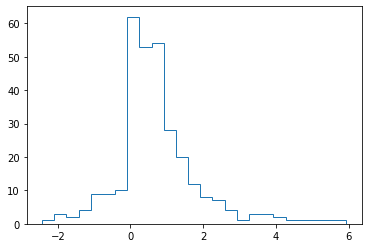

In [2]:
X = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(X, 25, histtype='step')
plt.show()

### Boostrapping: mean CI estimation

In [3]:
nX = len(X)
nSamples = 10000
X_boost = np.random.choice(X, (nX, nSamples))
m_boost = X_boost.mean(axis=0)
m_boost.sort()

ci = np.percentile(m_boost, [2.5, 97.5])
print('Bootstrapping CI: ', ci)

Bootstrapping CI:  [0.60409155 0.86731552]


### Jackknife

In [4]:
x = np.random.normal(0, 2, 100)
jkMean = jackknife(x, np.std)
jkVar = jackknifeVar(x, np.std)

print("\nJacknife estimation ")
print('Mean = ', jkMean)
print('Var = ', jkVar)


Jacknife estimation 
Mean =  2.0518962848970963
Var =  0.02227134985567878


### LOOCV (leave one out cross-validation)

Define function and variable space

In [5]:
a, b, c = 1, 2, 3
x = np.linspace(0, 5, 10)
y = a*x**2 + b*x + c + np.random.normal(0, 1, len(x))

Plot polynomial models

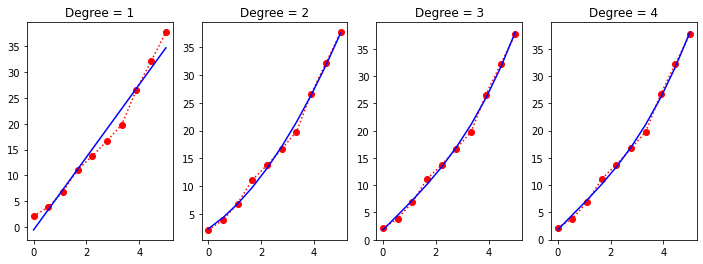

In [6]:
plt.figure(figsize=(12,4))
for deg in range(1, 5):
    plt.subplot(1, 4, deg)
    beta = np.polyfit(x, y, deg)
    plt.plot(x, y, 'r:o')
    plt.plot(x, np.polyval(beta, x), 'b-')
    plt.title('Degree = %d' % deg)
plt.show()

RSS does not detect overfitting and selects the most complex model

In [7]:
print('\nDirect RSS selection')
for deg in range(1, 5):
    print('Degree = %d, RSS=%.2f' % (deg, np.sum((y - np.polyval(np.polyfit(x, y, deg), x))**2.0)))


Direct RSS selection
Degree = 1, RSS=35.57
Degree = 2, RSS=5.79
Degree = 3, RSS=4.54
Degree = 4, RSS=4.54


LOOCV selects the correct model

In [8]:
print('\nLOOCV selection')
for deg in range(1, 5):
    print('Degree = %d, RSS=%.2f' % (deg, loocv(x, y, np.polyfit, np.polyval, deg)))


LOOCV selection
Degree = 1, RSS=372.29
Degree = 2, RSS=60.06
Degree = 3, RSS=53.97
Degree = 4, RSS=100.85


### Credits & Links

http://people.duke.edu/~ccc14/sta-663-2016/15B_ResamplingAndSimulation.html